In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
file_path = 'C:/Users/yashd/Downloads/enron1/enron1/ham/0007.1999-12-14.farmer.ham.txt'
with open(file_path, 'r') as infile:
    ham_sample = infile.read()
print(ham_sample)

Subject: mcmullen gas for 11 / 99
jackie ,
since the inlet to 3 river plant is shut in on 10 / 19 / 99 ( the last day of
flow ) :
at what meter is the mcmullen gas being diverted to ?
at what meter is hpl buying the residue gas ? ( this is the gas from teco ,
vastar , vintage , tejones , and swift )
i still see active deals at meter 3405 in path manager for teco , vastar ,
vintage , tejones , and swift
i also see gas scheduled in pops at meter 3404 and 3405 .
please advice . we need to resolve this as soon as possible so settlement
can send out payments .
thanks


In [4]:
file_path = 'C:/Users/yashd/Downloads/enron1/enron1/spam/0058.2003-12-21.GP.spam.txt'
with open(file_path, 'r') as infile:
    spam_sample = infile.read()
print(spam_sample)

Subject: stacey automated system generating 8 k per week parallelogram
people are
getting rich using this system ! now it ' s your
turn !
we ' ve
cracked the code and will show you . . . .
this is the
only system that does everything for you , so you can make
money
. . . . . . . .
because your
success is . . . completely automated !
let me show
you how !
click
here
to opt out click here % random _ text



## Loading the data

In [5]:
import glob
import os
emails, labels = [], []

In [6]:
#Loading spam email data
#Spam emails will have label as 1
file_path = 'C:/Users/yashd/Downloads/enron1/enron1/spam/'
for filename in glob.glob(os.path.join(file_path, '*.txt')):
    with open(filename,'r',encoding="ISO-8859-1") as infile:
        emails.append(infile.read())
        labels.append(1)

In [7]:
#Loading legitimate email data
#Legitimate emails will have label as 0
file_path = 'C:/Users/yashd/Downloads/enron1/enron1/ham/'
for filename in glob.glob(os.path.join(file_path, '*.txt')):
    with open(filename,'r',encoding="ISO-8859-1") as infile:
        emails.append(infile.read())
        labels.append(0)

In [8]:
print(f"Email length: {len(emails)}, Label length: {len(labels)}")

Email length: 5172, Label length: 5172


## Data preprocessing

Data preprocessing includes the following steps:
1. Number and punctuation removal
2. Human name removal (optional)
3. Stop words removal
4. Lemmatization

In [9]:
from nltk.corpus import names
from nltk.stem import WordNetLemmatizer

def letters_only(astr):
    return astr.isalpha()
all_names = set(names.words())
lemmatizer = WordNetLemmatizer()

In [10]:
#Function for text cleaning
def clean_text(docs):
    cleaned_docs = []
    for doc in docs:
        cleaned_docs.append(
            ' '.join([lemmatizer.lemmatize(word.lower())
                      for word in doc.split()
                      if letters_only(word)
                      and word not in all_names])
        )
    return cleaned_docs

In [11]:
cleaned_emails = clean_text(emails)
print(cleaned_emails[0])

dobmeos with hgh my energy level ha gone up stukm introducing doctor formulated hgh human growth hormone also called hgh is referred to in medical science a the master hormone it is very plentiful when we are young but near the age of twenty one our body begin to produce le of it by the time we are forty nearly everyone is deficient in hgh and at eighty our production ha normally diminished at least advantage of hgh increased muscle strength loss in body fat increased bone density lower blood pressure quickens wound healing reduces cellulite improved vision wrinkle disappearance increased skin thickness texture increased energy level improved sleep and emotional stability improved memory and mental alertness increased sexual potency resistance to common illness strengthened heart muscle controlled cholesterol controlled mood swing new hair growth and color restore read more at this website unsubscribe


In [12]:
print(emails[0])

Subject: dobmeos with hgh my energy level has gone up ! stukm
introducing
doctor - formulated
hgh
human growth hormone - also called hgh
is referred to in medical science as the master hormone . it is very plentiful
when we are young , but near the age of twenty - one our bodies begin to produce
less of it . by the time we are forty nearly everyone is deficient in hgh ,
and at eighty our production has normally diminished at least 90 - 95 % .
advantages of hgh :
- increased muscle strength
- loss in body fat
- increased bone density
- lower blood pressure
- quickens wound healing
- reduces cellulite
- improved vision
- wrinkle disappearance
- increased skin thickness texture
- increased energy levels
- improved sleep and emotional stability
- improved memory and mental alertness
- increased sexual potency
- resistance to common illness
- strengthened heart muscle
- controlled cholesterol
- controlled mood swings
- new hair growth and color restore
read
more at this website
unsubscribe


### Removing stop words and extracting features

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words="english", max_features=500)

In [14]:
term_docs = cv.fit_transform(cleaned_emails)
print(term_docs[0])

  (0, 125)	2
  (0, 178)	2
  (0, 47)	1
  (0, 497)	1
  (0, 231)	1
  (0, 445)	1
  (0, 345)	1
  (0, 250)	1
  (0, 424)	1
  (0, 285)	1
  (0, 69)	1
  (0, 357)	1
  (0, 481)	1


In [15]:
#Checking the terms of the sparse matrix
feature_names = cv.get_feature_names()
print(feature_names[125])
print(feature_names[481])

energy
website


## Building and Training the model

In [16]:
def get_label_index(labels):
    from collections import defaultdict
    label_index = defaultdict(list)
    for index, label in enumerate(labels):
        label_index[label].append(index)
    return label_index
label_index = get_label_index(labels)

In [17]:
print(label_index)

defaultdict(<class 'list'>, {1: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 21

In [18]:
#Calculating the prior or P(yk)
def get_prior(label_index):
    """ Compute prior based on training samples
    Args: label_index (grouped sample indices by class)
Returns: dictionary, with class label as key, corresponding prior as the value """
    prior = {label : len(index) for label,index
             in label_index.items()}
    total_count = sum(prior.values())
    for label in prior:
        prior[label] /= float(total_count)
    return prior

In [19]:
prior = get_prior(label_index)
prior

{1: 0.2900232018561485, 0: 0.7099767981438515}

In [20]:
#Calculating the likelihood or P(x|yk)
import numpy as np
def get_likelihood(term_document_matrix, label_index, smoothing=0):
    """ Compute likelihood based on training samples
    Args:
      term_document_matrix (sparse matrix)
      label_index (grouped sample indices by class)
      smoothing (integer, additive Laplace smoothing)
    Returns:
      dictionary, with class as key, corresponding conditional probability P(feature|class) vector as value """
    likelihood = {}
    for label,index in label_index.items():
        likelihood[label] = term_document_matrix[index,:].sum(axis=0) + smoothing
        likelihood[label] = np.asarray(likelihood[label])[0]
        total_count = likelihood[label].sum()
        likelihood[label] =  likelihood[label]/float(total_count)
    return likelihood

In [21]:
smoothing = 1
likelihood = get_likelihood(term_docs,label_index,smoothing)
print(likelihood[0][:5]) # first five terms of P(feature | legitimate)

[0.00108581 0.00095774 0.00087978 0.00084637 0.00010023]


In [22]:
#Calculating posterior or P(yk | x)
def get_posterior(term_document_matrix, prior, likelihood):
    """ Compute posterior of testing samples, based on prior and likelihood
    Args:
      term_document_matrix (sparse matrix)
      prior (dictionary, with class label as key,corresponding prior as the value)
      likelihood (dictionary, with class label as key,corresponding conditional probability vector as value)
    Returns:
      dictionary, with class label as key, corresponding posterior as value """
    num_docs = term_document_matrix.shape[0]
    posteriors = []
    # posterior is proportional to prior * likelihood
    # = exp(log(prior * likelihood))
    # = exp(log(prior) + log(likelihood))
    for i in range(num_docs):
        posterior = {key: np.log(prior_label)
                     for key,prior_label in prior.items()}
        for label, likelihood_label in likelihood.items():
            term_document_vector = term_document_matrix.getrow(i)
            counts = term_document_vector.data
            indices = term_document_vector.indices

            for count,index in zip(counts,indices):
                posterior[label] += np.log(likelihood_label[index])*count
        # exp(-1000):exp(-999) will cause zero division error,
        # however it equates to exp(0):exp(1)
        min_log_posterior = min(posterior.values())
        for label in posterior:
            try:
                posterior[label] = np.exp(posterior[label] - min_log_posterior)
            except:
                posterior[label] = float('inf')
                # if one's log value is excessively large, assign it infinity
        # normalize so that all sums up to 1
        sum_posterior = sum(posterior.values())
        for label in posterior:
            if posterior[label] == float('inf'):
                posterior[label] = 1
            else:
                posterior[label] /= sum_posterior
        posteriors.append(posterior.copy())
    return posteriors

## Splitting the dataset

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(cleaned_emails,labels,test_size=0.33,random_state=25)

## Retraining, testing and prediction

In [24]:
#Retraining for X_train
term_docs_train = cv.fit_transform(X_train)
label_index = get_label_index(Y_train)
prior = get_prior(label_index)
likelihood = get_likelihood(term_docs_train, label_index, smoothing)

In [25]:
#Predicting posterior for X_test
term_docs_test = cv.transform(X_test)
posterior = get_posterior(term_docs_test, prior, likelihood)

In [26]:
#Evaluating model performance
correct = 0.0
for pred, actual in zip(posterior, Y_test):
    if actual == 1:
        if pred[1] >= 0.5:
            correct += 1
    elif pred[0] > 0.5:
        correct += 1
print(f"The accuracy on {len(Y_test)} samples is: {(correct/len(Y_test))*100}%")

The accuracy on 1707 samples is: 91.56414762741653%


# Using MultinomialNB sklearn library

In [27]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha=1.0, fit_prior=True)

In [28]:
clf.fit(term_docs_train, Y_train)

MultinomialNB()

In [29]:
prediction_prob = clf.predict_proba(term_docs_test) #to get pred probabilities
prediction = clf.predict(term_docs_test) # to get prob as 0 or 1

In [30]:
accuracy = clf.score(term_docs_test, Y_test)
print(f"Accuracy of MultinomialNB is: {accuracy*100}%")

Accuracy of MultinomialNB is: 91.56414762741653%


## Creating confusion matrix

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, prediction, labels=[0,1])

array([[1109,   81],
       [  63,  454]], dtype=int64)

In [32]:
from sklearn.metrics import precision_score, recall_score, f1_score
print(f"Precision: {precision_score(Y_test, prediction, pos_label=1)}")
print(f"Recall: {recall_score(Y_test, prediction, pos_label=1)}")
print(f"F1-score: {f1_score(Y_test, prediction, pos_label=1)}")

Precision: 0.8485981308411215
Recall: 0.8781431334622823
F1-score: 0.8631178707224335


In [33]:
from sklearn.metrics import classification_report
print (classification_report(Y_test, prediction))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1190
           1       0.85      0.88      0.86       517

    accuracy                           0.92      1707
   macro avg       0.90      0.91      0.90      1707
weighted avg       0.92      0.92      0.92      1707



In [34]:
prediction_prob

array([[9.99744838e-001, 2.55161592e-004],
       [1.00000000e+000, 7.07072100e-041],
       [1.00000000e+000, 1.51675848e-172],
       ...,
       [1.26959241e-026, 1.00000000e+000],
       [1.00000000e+000, 4.05429049e-038],
       [7.57003384e-029, 1.00000000e+000]])

In [37]:
#ROC curve : plot of true positive rates versus false positive rates
pos_prob = prediction_prob[:,1]
thresholds = np.arange(0.0,1.2,0.1)
true_pos, false_pos = [0]*len(thresholds), [0]*len(thresholds)
for pred, y in zip(pos_prob, Y_test):
    for i, threshold in enumerate(thresholds):
        if pred >= threshold:
            if y == 1: #if truth and prediction are both 1
                true_pos[i] += 1
            else: # if truth is 0 but prediction is 1
                false_pos[i] += 1
        else:
            break

In [42]:
true_pos_rate = [tp/517.0 for tp in true_pos]
false_pos_rate = [fp/1190.0 for fp in false_pos]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


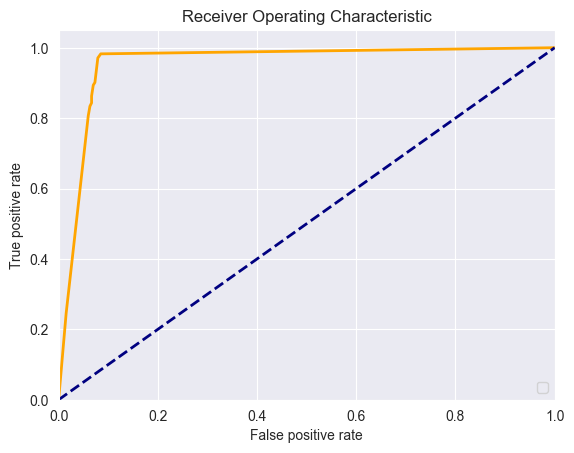

In [44]:
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(false_pos_rate, true_pos_rate, color='orange', lw=lw)
plt.plot([0,1],[0,1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [45]:
from sklearn.metrics import roc_auc_score
print(f"ROC score: {roc_auc_score(Y_test, pos_prob)}")

ROC score: 0.9620288347447296


## Model tuning using Cross Validation

In [46]:
from sklearn.model_selection import StratifiedKFold
k = 10
k_fold = StratifiedKFold(n_splits=k)
cleaned_emails_np = np.array(cleaned_emails)
labels_np = np.array(labels)

In [47]:
max_features_option = [500,1000,2000,4000,8000]
smoothing_factor_option = [0.5, 1.0, 1.5, 2.0]
fit_prior_option = [True, False]
auc_record = {}

In [48]:
for train_indices, test_indices in k_fold.split(cleaned_emails, labels):
    X_train, X_test = cleaned_emails_np[train_indices], cleaned_emails_np[test_indices]
    Y_train, Y_test = labels_np[train_indices], labels_np[test_indices]

    for max_features in max_features_option:
        if max_features not in auc_record:
            auc_record[max_features] = {}
        cv = CountVectorizer(stop_words="english", max_features=max_features)
        term_docs_train = cv.fit_transform(X_train)
        term_docs_test = cv.transform(X_test)
        for smoothing in smoothing_factor_option:
            if smoothing not in auc_record[max_features]:
                auc_record[max_features][smoothing] = {}
            for fit_prior in fit_prior_option:
                clf = MultinomialNB(alpha=smoothing, fit_prior=fit_prior)
                clf.fit(term_docs_train, Y_train)
                prediction_prob = clf.predict_proba(term_docs_test)
                pos_prob = prediction_prob[:,1]
                auc = roc_auc_score(Y_test, pos_prob)
                auc_record[max_features][smoothing][fit_prior] = auc + auc_record[max_features][smoothing].get(fit_prior, 0.0)

In [56]:
print('max features  smoothing  fit prior     auc')
for max_features, max_feature_record in auc_record.items():
    for smoothing, smoothing_record in max_feature_record.items():
        for fit_prior, auc in smoothing_record.items():
            print(f'    {max_features}         {smoothing}        {fit_prior}       {auc/10:.4f}')

max features  smoothing  fit prior     auc
    500         0.5        True       0.9611
    500         0.5        False       0.9610
    500         1.0        True       0.9599
    500         1.0        False       0.9597
    500         1.5        True       0.9588
    500         1.5        False       0.9587
    500         2.0        True       0.9581
    500         2.0        False       0.9580
    1000         0.5        True       0.9667
    1000         0.5        False       0.9667
    1000         1.0        True       0.9654
    1000         1.0        False       0.9655
    1000         1.5        True       0.9646
    1000         1.5        False       0.9646
    1000         2.0        True       0.9639
    1000         2.0        False       0.9639
    2000         0.5        True       0.9744
    2000         0.5        False       0.9744
    2000         1.0        True       0.9726
    2000         1.0        False       0.9725
    2000         1.5        True   

(8000, 0.5, True) set enables best AUC of 0.9856